In [1]:
# Import Memspectrum
from memspectrum import MESA

import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt

%matplotlib inline 

#### outputted results

Pedestrians in the outputted frames are in the same order in each picture but the identification will identify them in a different order

person original order is 0 1 2 I will put the correct order under each output:


{'frame 540': {0: {'pedestrian 0': (767, 1243)}, 1: {'pedestrian 1': (803, 1368)}, 3: {'pedestrian 2': (782, 1452)}}}

0 1 2

{'frame 550': {0: {'pedestrian 0': (752, 1217)}, 1: {'pedestrian 1': (776, 1324)}, 2: {'pedestrian 2': (774, 1422)}}}

0 1 2

{'frame 560': {0: {'pedestrian 0': (789, 1367)}, 1: {'pedestrian 1': (746, 1188)}, 2: {'pedestrian 2': (767, 1295)}}}

1 2 0

{'frame 570': {0: {'pedestrian 0': (759, 1266)}, 1: {'pedestrian 1': (766, 1332)}, 2: {'pedestrian 2': (716, 1148)}}}

2 0 1

{'frame 580': {0: {'pedestrian 0': (742, 1235)}, 1: {'pedestrian 1': (717, 1126)}, 2: {'pedestrian 2': (760, 1305)}}}

1 0 2

{'frame 590': {0: {'pedestrian 0': (741, 1217)}, 1: {'pedestrian 1': (753, 1271)}, 2: {'pedestrian 2': (711, 1101)}}}

2 0 1

{'frame 600': {0: {'pedestrian 0': (736, 1191)}, 1: {'pedestrian 1': (739, 1246)}, 2: {'pedestrian 2': (699, 1078)}}}

2 0 1

{'frame 610': {0: {'pedestrian 0': (739, 1228)}, 1: {'pedestrian 1': (722, 1171)}, 2: {'pedestrian 2': (690, 1073)}}}

2 1 0

{'frame 620': {0: {'pedestrian 0': (725, 1212)}, 1: {'pedestrian 1': (719, 1154)}, 2: {'pedestrian 2': (689, 1065)}}}

2 1 0

{'frame 630': {0: {'pedestrian 0': (714, 1138)}, 1: {'pedestrian 1': (729, 1186)}, 2: {'pedestrian 2': (689, 1058)}}}

2 0 1

In [2]:
# Making dataset from the 3 pedestrians movments 

# Pedestrian 0
person_0_X = [767, 752, 746, 716, 717, 711, 699, 690, 689, 689]

person_0_Y = [1243, 1217, 1188, 1148, 1126, 1101, 1078, 1073, 1065, 1058]

# Pedestrian 1
person_1_X = [803, 776, 767, 759, 742, 741, 736, 722, 719, 714]

person_1_Y = [1368, 1324, 1295, 1266, 1235, 1217, 1191, 1171, 1154, 1138]

# Pedestrian 2
person_2_X = [782, 774, 789, 766, 760, 753, 739, 739, 725, 729]

person_2_Y = [1452, 1422, 1367, 1332, 1305, 1271, 1246, 1228, 1212, 1186]

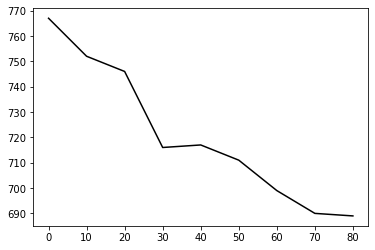

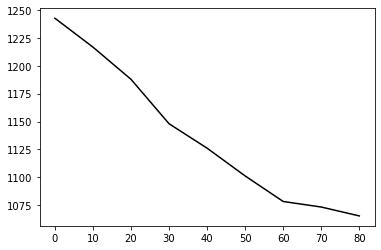

In [49]:
N, dt = 10, 10  # Number of samples and sampling interval
no_pred = 2
time = np.arange(0, N) * dt

plt.plot(time[:-1], person_0_X[:-1], color = 'k')
plt.show()

plt.plot(time[:-1], person_0_Y[:-1], color = 'k')
plt.show()

In [53]:
M = MESA()
ooft = M.solve(person_0_X[:-no_pred])
print(ooft)

for o in ooft:
    print(o)

print(person_0_X[:-no_pred])

a = person_0_X[:-no_pred]

b = np.expand_dims(a, axis=1)

c = np.reshape(a, (2,4))

d = np.array(a)

print(b)

print(b.shape)

print(c)

print(c.shape)



(525909.5, array([1]), array([339.35609135, 400.61225169, 393.00659391, 439.44976538,
       627.58039828]))
525909.5
[1]
[339.35609135 400.61225169 393.00659391 439.44976538 627.58039828]
[767, 752, 746, 716, 717, 711, 699, 690]
[[767]
 [752]
 [746]
 [716]
 [717]
 [711]
 [699]
 [690]]
(8, 1)
[[767 752 746 716]
 [717 711 699 690]]
(2, 4)


In [54]:
forecast = M.forecast(c, length = no_pred, number_of_simulations = no_pred*1, include_data = False)
median = np.median(forecast, axis = 0) # Ensemble median

AssertionError: Wrong number of dimension for data: 1 dim expcted but got 2 dims

Example Memspectrum to work with 

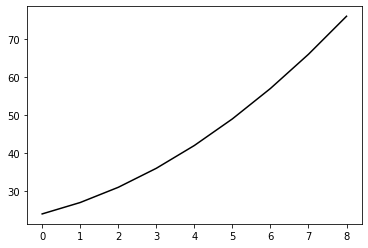

In [3]:
N, dt = 10, 1  # Number of samples and sampling interval
no_pred = 2
time = np.arange(0, N) * dt
data = [24, 27, 31, 36, 42, 49, 57, 66, 76, 87]
plt.plot(time[:-1], data[:-1], color = 'k')
plt.show()

In [4]:
M = MESA()
M.solve(data[:-no_pred])
forecast = M.forecast(data[:-no_pred], length = no_pred, number_of_simulations = no_pred*10, 
include_data = False)
median = np.median(forecast, axis = 0) # Ensemble median

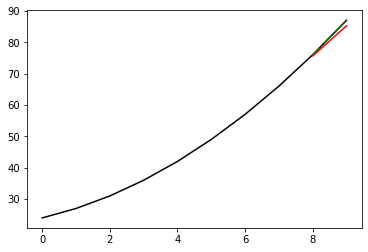

In [5]:
plt.plot(time, data, color = 'k')
plt.plot(time[N-no_pred:], data[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median, color = 'r', label = 'median estimate')
plt.show()

In [ ]:
# Sum Squared Error just as a quick evaluation
real_values = data[N-no_pred:]
print("Real Values = ", real_values)
print("Median Values = ", median)
SSE = np.sum((real_values - median)**2)
print("SSE = ", SSE)